### Library

In [1]:
import pandas as pd
import os
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
mpl.rc('font',family = 'Malgun Gothic')
from collections import Counter
from PIL import Image
import numpy as np

### Data Load

In [2]:
os.chdir("C:/Users/JYW/Desktop/Github/Data-Science-for-COVID-19")

data = pd.read_csv("insta_csvtext2.csv")
data = data.iloc[:,1:]

location = data.iloc[:,0]
location = [x for x in location if str(x) != '[']
location = [x for x in location if str(x) != '0']

time = data.iloc[:,1]

hash = data.iloc[:,2:]
hash = list(hash.values.flatten())
hash = [x for x in hash if str(x) != 'nan']

### 1. Location

In [3]:
loc = pd.DataFrame(pd.Series(location).value_counts())
loc.head(30)

,0
"Seoul, South Korea",49
"Seoul, Korea",47
"Daegu, South Korea",31
"Busan, South Korea",23
"Ulsan, South Korea",17
방이동 바티칸 Bartican,16
South Korea,13
우리집,12
"Busan 釜山, South Korea",12
Daejeon,11


### 2. Time

In [4]:
time = time.value_counts().sort_index()
time

0              319
2018-05-14       1
2018-06-09       1
2018-06-27       1
2018-07-11       1
              ... 
2020-04-16      20
2020-04-17      27
2020-04-18    3091
2020-04-19    3347
2020-04-20    1668
Name: 1, Length: 66, dtype: int64

### 3. Hashtags

In [5]:
pd.Series(hash).value_counts().head(40)

코로나         7121
코로나19       1469
일상          1285
마스크필수       1146
코로나예방       1093
마스크추천       1051
미세먼지마스크     1047
일회용마스크      1046
필터마스크       1041
닥터홍헤파필터     1039
닥터홍마스크필터    1038
맞팔           976
좋아요          855
소통           685
데일리          600
선팔           570
좋아요반사        568
좋반           555
마스크          532
daily        517
팔로우          487
셀스타그램        392
셀카           391
사회적거리두기      386
선팔하면맞팔       370
주말           357
일상스타그램       342
ootd         333
집콕           331
셀피           310
selfie       288
봄            274
인친           239
fff          232
f4f          229
여행           225
오오티디         203
follow       195
대구           194
조심           192
dtype: int64

광고성 글, 맞팔 관련 해시태그는 지우고 보자!

In [6]:
ban_list = ["코로나","코로나19","일회용마스크","미세먼지마스크","필터마스크","닥터홍헤파필터","닥터홍마스크필터",
            "맞팔","좋아요","소통","선팔","좋아요반사","좋반","팔로우","인친","맞팔해요","선팔하면맞팔"]
hash = [x for x in hash if x not in ban_list]
pd.Series(hash).value_counts().head(40)

일상              1285
마스크필수           1146
코로나예방           1093
마스크추천           1051
데일리              600
마스크              532
daily            517
셀스타그램            392
셀카               391
사회적거리두기          386
주말               357
일상스타그램           342
ootd             333
집콕               331
셀피               310
selfie           288
봄                274
fff              232
f4f              229
여행               225
오오티디             203
follow           195
대구               194
조심               192
인스타그램            189
부산               186
육아               184
럽스타그램            175
likeforlikes     162
선팔맞팔             158
데일리룩             158
코로나바이러스          157
먹스타그램            156
얼스타그램            156
카페               155
육아소통             153
instadaily       153
육아스타그램           152
맛집               152
첫줄               150
dtype: int64

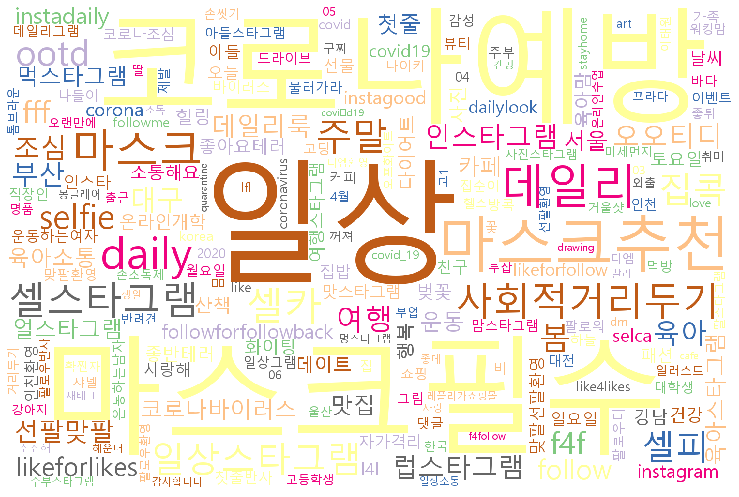

In [7]:
hash = Counter(hash)
hash_count = dict(hash.most_common(1000))

wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(hash_count)

fig = plt.figure(1,figsize=(13,13))
fig = plt.axis('off')
plt.imshow(wordcloud)

쫌 더 귀여운 모습으로!!

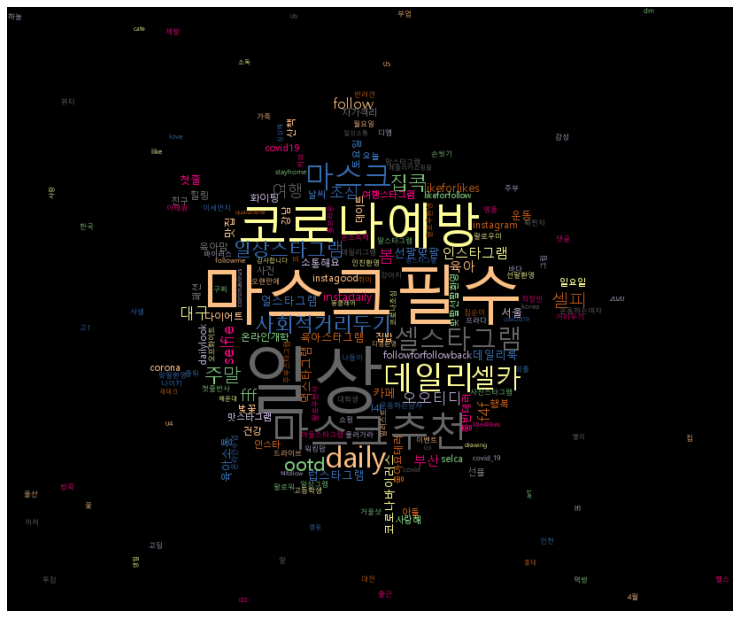

In [8]:
img = np.array(Image.open('covid.jpg'))

wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='black',colormap = "Accent_r",  mask = img, margin=1).generate_from_frequencies(hash_count)
wordcloud = wordcloud.to_array()

fig = plt.figure(1,figsize=(13,13))
fig = plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear")